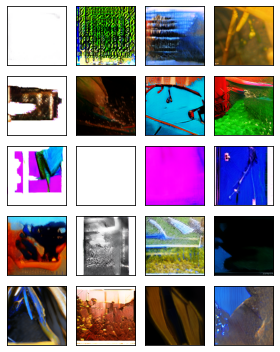

In [15]:
# create some image 
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt 
import numpy as np

tmp = ImageFolder(root="/data_slow/kirchheim/gan_oe/imagenet/3.0")
fix, axs = plt.subplots(5,4, figsize=(4,5))

axs = axs.flatten()
for i in range(len(axs)):
    axs[i].imshow(np.array(tmp[i][0]))
    axs[i].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

plt.tight_layout()
plt.savefig("imagenet-bigan-samples.png", dpi=300)
plt.show()

['x', 'y']
(50000, 3, 32, 32)


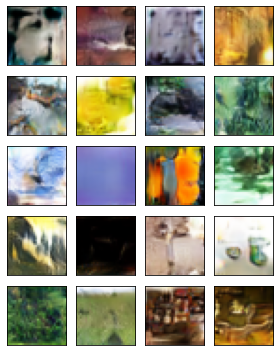

In [16]:
import numpy as np
data = np.load("samples-c100.npz")
import matplotlib.pyplot as plt
print(list(data.keys()))

x = data["x"]

print(x.shape)
fix, axs = plt.subplots(5,4, figsize=(4,5))

axs = axs.flatten()
for i in range(len(axs)):
    axs[i].imshow(np.moveaxis(x[i], 0, -1))
    axs[i].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

plt.tight_layout()
plt.savefig("c100-bigan-samples.png", dpi=300)
plt.show()

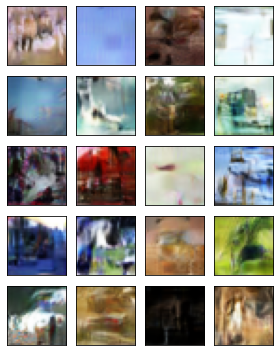

In [17]:
x = torch.load("samples-c10.pt").numpy()

fix, axs = plt.subplots(5,4, figsize=(4,5))

axs = axs.flatten()
for i in range(len(axs)):
    axs[i].imshow(np.moveaxis(x[i], 0, -1))
    axs[i].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)

plt.tight_layout()
plt.savefig("c10-bigan-samples.png", dpi=300)
plt.show()

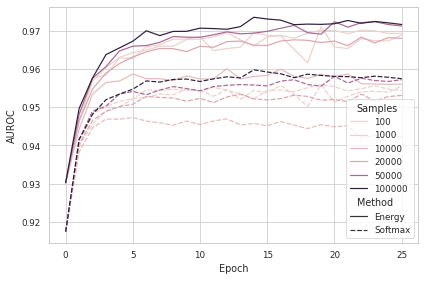

In [7]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['pgf.texsystem'] = "pdflatex"

sb.set_style("whitegrid")
sb.set_context("paper")


tmp = pd.read_csv(f"results/c10-size-vs-auroc.csv")
tmp["Samples"] = tmp["Length"]
tmp["Epoch"] = tmp["Epoch"] + 1 
tmp = tmp.groupby(["Epoch", "Samples", "Method"]).mean()

sb.lineplot(data=tmp,  x="Epoch", y="AUROC", hue="Samples", style="Method") 
plt.tight_layout()
plt.savefig("img/size-vs-auroc-c10.png", dpi=300)
plt.savefig("img/size-vs-auroc-c10.pgf", dpi=300)